In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# segment with rectangle of grabcut

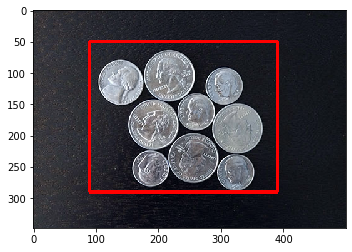

In [8]:
im = cv2.imread('coin.jpg')
mask = np.zeros(im.shape[:2], dtype=np.uint8)
imo = im.copy()

# rect = (50, 90, 290, 388)
rect = (90, 50, 390,290)
# drawing the box in the image
imr=cv2.rectangle(im, (rect[:2]), (rect[2:4]), (255,0,0),4)
plt.imshow(imr)


In [9]:
# allocate memory for two arrays that the GrabCut algorithm internally
fgModel = np.zeros((1, 65), dtype="float")
bgModel = np.zeros((1, 65), dtype="float")

# call the grabcut function
mask, bgModel, fgModel = cv2.grabCut(imo, mask, rect, bgModel, fgModel, iterCount=3, mode=cv2.GC_INIT_WITH_RECT)


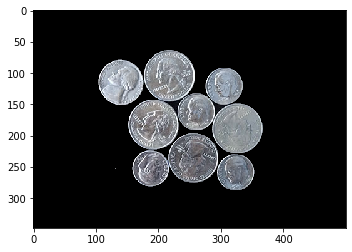

In [12]:
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
seg = imo*mask2[:,:,np.newaxis]
plt.imshow(seg)

In [11]:
np.unique(mask)

array([0, 2, 3], dtype=uint8)

# segment with mask of grabcut

In [42]:
print(cv2.GC_BGD, cv2.GC_FGD, cv2.GC_PR_BGD, cv2.GC_PR_FGD)

0 1 2 3


In [13]:
import cv2
import numpy as np
import time

img_src = 'baoguang.jpg'

drawing = False
mode = False

# graphcut using the grabcut function

class GrabCut:
    def __init__(self, t_img):
        self.img = t_img
        self.img_raw = img.copy()
        self.img_width = img.shape[0]
        self.img_height = img.shape[1]
        self.scale_size = 640 * self.img_width // self.img_height
        if self.img_width > 640:
            self.img = cv2.resize(self.img, (640, self.scale_size), interpolation=cv2.INTER_AREA)
        self.img_show = self.img.copy()
        self.img_gc = self.img.copy()
        self.img_gc = cv2.GaussianBlur(self.img_gc, (3, 3), 0)
        self.lb_up = False
        self.rb_up = False
        self.lb_down = False
        self.rb_down = False
        self.mask = np.full(self.img.shape[:2], 2, dtype=np.uint8)
        self.firt_choose = True


# callback function of mouse
def mouse_event2(event, x, y, flags, param):
    global drawing, last_point, start_point
    # left key, draw the object
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        last_point = (x, y)
        start_point = last_point
        param.lb_down = True
        print('mouse lb down')
    elif event == cv2.EVENT_RBUTTONDOWN:
        drawing = True
        last_point = (x, y)
        start_point = last_point
        param.rb_down = True
        print('mouse rb down')
    # moving the mouse, drawing the trace
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            if param.lb_down:
                cv2.line(param.img_show, last_point, (x, y), (0, 0, 255), 2, -1)
                cv2.rectangle(param.mask, last_point, (x, y), 1, -1, 4)
            else:
                cv2.line(param.img_show, last_point, (x, y), (255, 0, 0), 2, -1)
                cv2.rectangle(param.mask, last_point, (x, y), 0, -1, 4)
            last_point = (x, y)
    # release the left key, finishing drawing 
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        param.lb_up = True
        param.lb_down = False
        cv2.line(param.img_show, last_point, (x, y), (0, 0, 255), 2, -1)
        if param.firt_choose:
            param.firt_choose = False
        cv2.rectangle(param.mask, last_point, (x, y), 1, -1, 4)
        print('mouse lb up')
    elif event == cv2.EVENT_RBUTTONUP:
        drawing = False
        param.rb_up = True
        param.rb_down = False
        cv2.line(param.img_show, last_point, (x, y), (255, 0, 0), 2, -1)
        if param.firt_choose:
            param.firt_choose = False
            param.mask = np.full(param.img.shape[:2], 3, dtype=np.uint8)
        cv2.rectangle(param.mask, last_point, (x, y), 0, -1, 4)
        print('mouse rb up')


if __name__ == '__main__':
    img = cv2.imread(img_src)
    if img is None:
        print('error: 图像为空')
    g_img = GrabCut(img)

    cv2.namedWindow('image')
    # calllback funciton
    cv2.setMouseCallback('image', mouse_event2, g_img)
    while (True):
        cv2.imshow('image', g_img.img_show)
        if g_img.lb_up or g_img.rb_up:
            g_img.lb_up = False
            g_img.rb_up = False
            start = time.process_time()
            bgdModel = np.zeros((1, 65), np.float64)
            fgdModel = np.zeros((1, 65), np.float64)

            rect = (1, 1, g_img.img.shape[1], g_img.img.shape[0])
            print(g_img.mask)
            mask = g_img.mask
            g_img.img_gc = g_img.img.copy()
#             call the grabcut
            cv2.grabCut(g_img.img_gc, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_MASK)
            elapsed = (time.process_time() - start)
#             to show the sementation result
            mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')  # 0和2做背景
            g_img.img_gc = g_img.img_gc * mask2[:, :, np.newaxis]  # 使用蒙板来获取前景区域
            cv2.imshow('result', g_img.img_gc)

            print("Time used:", elapsed)

        # press ESC key, break the program
        if cv2.waitKey(20) == 27:
            break
#         release the memory
    cv2.destroyAllWindows()

mouse lb down
mouse lb up
[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
Time used: 0.734375


In [2]:
cv2.grabCut??

Docstring:
grabCut(img, mask, rect, bgdModel, fgdModel, iterCount[, mode]) -> mask, bgdModel, fgdModel
.   @brief Runs the GrabCut algorithm.
.   
.   The function implements the [GrabCut image segmentation algorithm](http://en.wikipedia.org/wiki/GrabCut).
.   
.   @param img Input 8-bit 3-channel image.
.   @param mask Input/output 8-bit single-channel mask. The mask is initialized by the function when
.   mode is set to #GC_INIT_WITH_RECT. Its elements may have one of the #GrabCutClasses.
.   @param rect ROI containing a segmented object. The pixels outside of the ROI are marked as
.   "obvious background". The parameter is only used when mode==#GC_INIT_WITH_RECT .
.   @param bgdModel Temporary array for the background model. Do not modify it while you are
.   processing the same image.
.   @param fgdModel Temporary arrays for the foreground model. Do not modify it while you are
.   processing the same image.
.   @param iterCount Number of iterations the algorithm should make before 